## # _**Analisis de datos generando una grafica de barras en base a los datos generales sin filtros**_

In [0]:
dbutils.fs.ls("/mnt/processed/")

[FileInfo(path='dbfs:/mnt/processed/Ads_General_Por_Dia/', name='Ads_General_Por_Dia/', size=0, modificationTime=1726248164000),
 FileInfo(path='dbfs:/mnt/processed/Ads_General_Por_Hora/', name='Ads_General_Por_Hora/', size=0, modificationTime=1726248385000),
 FileInfo(path='dbfs:/mnt/processed/Ads_General_Total/', name='Ads_General_Total/', size=0, modificationTime=1726249527000)]

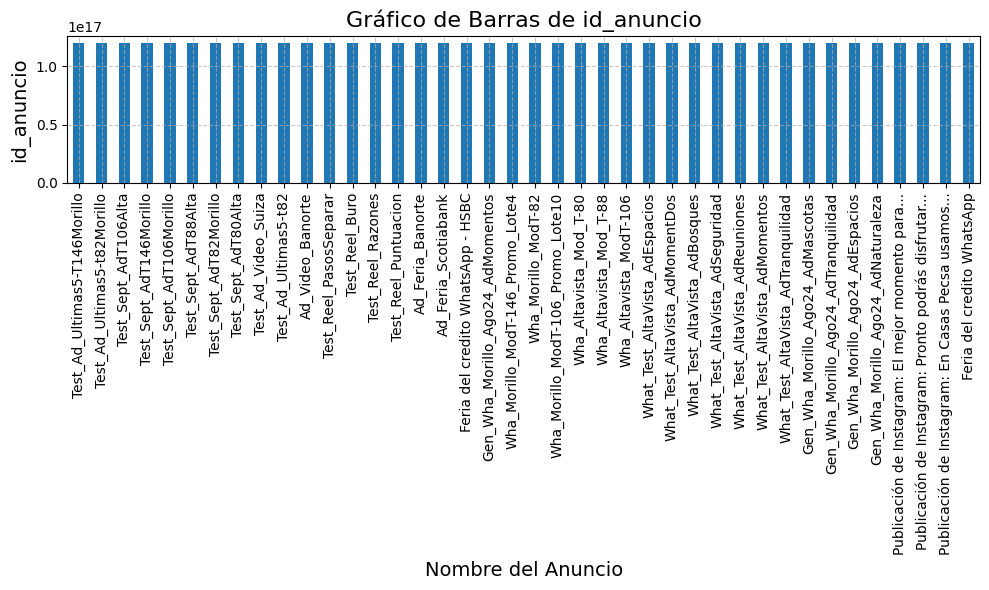

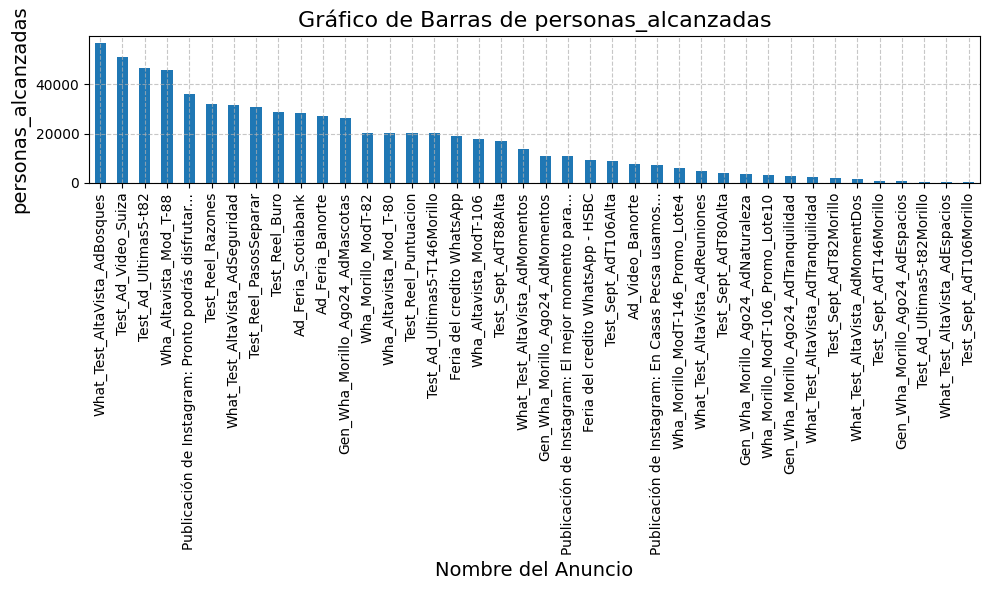

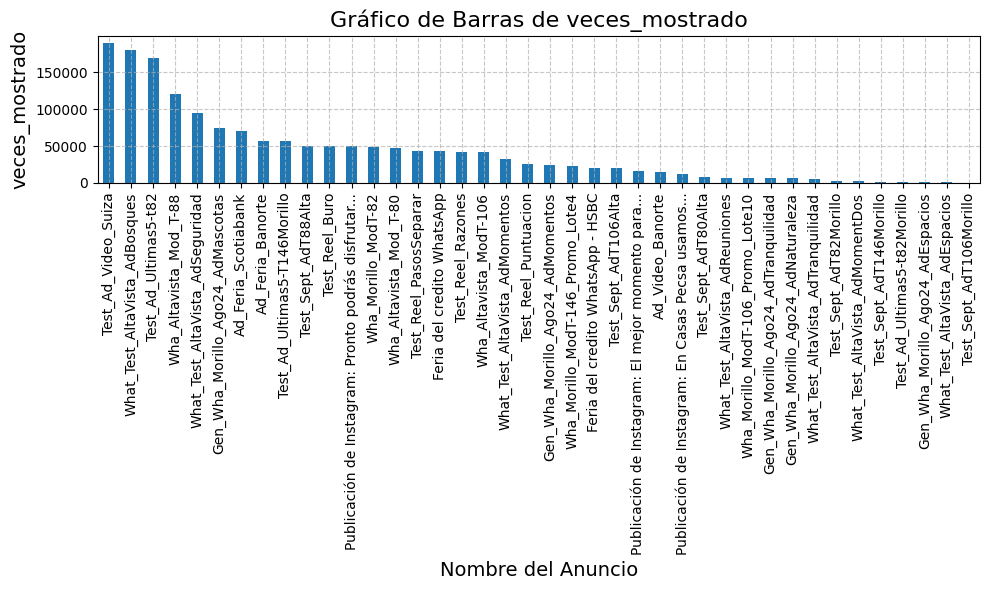

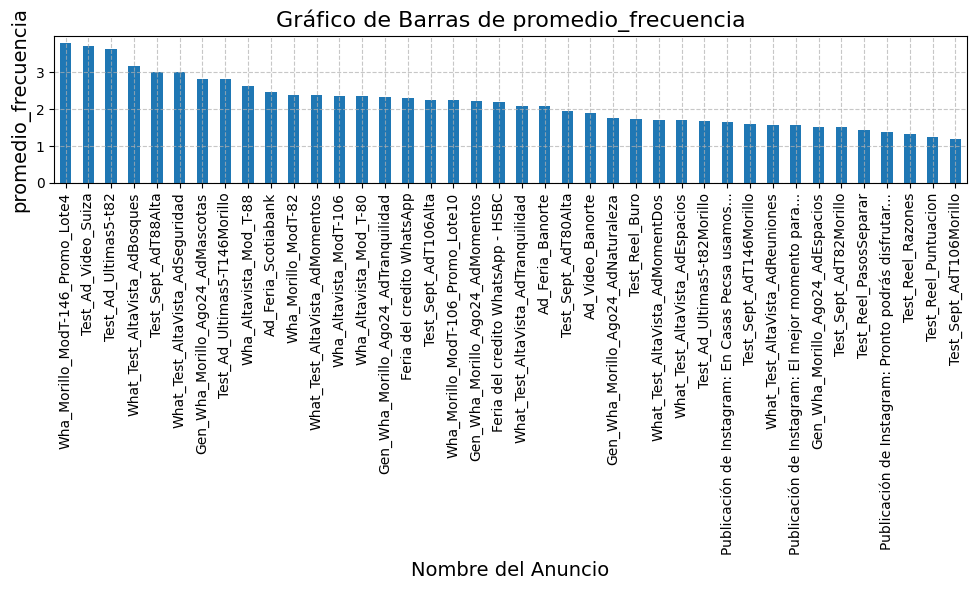

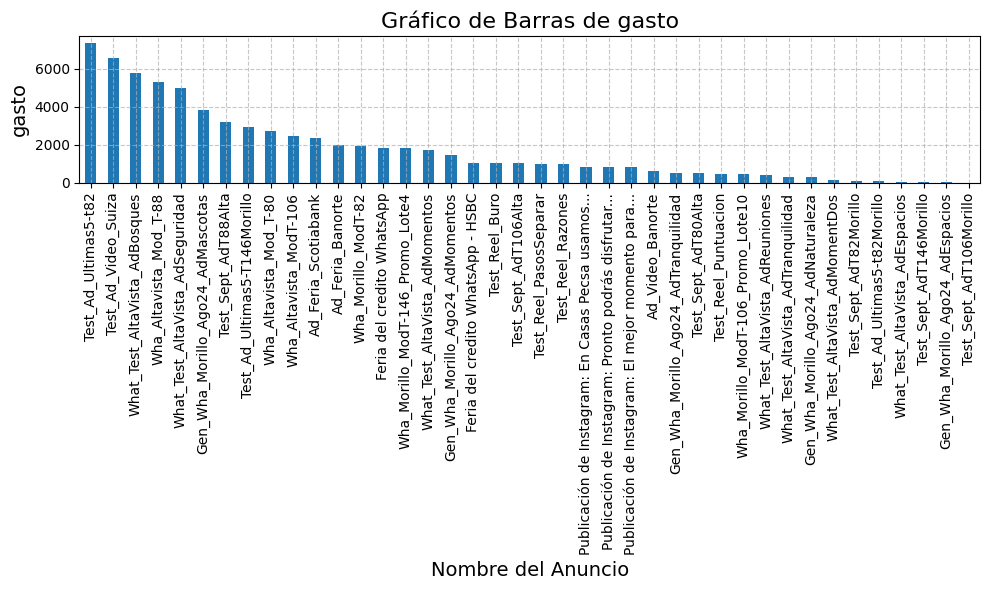

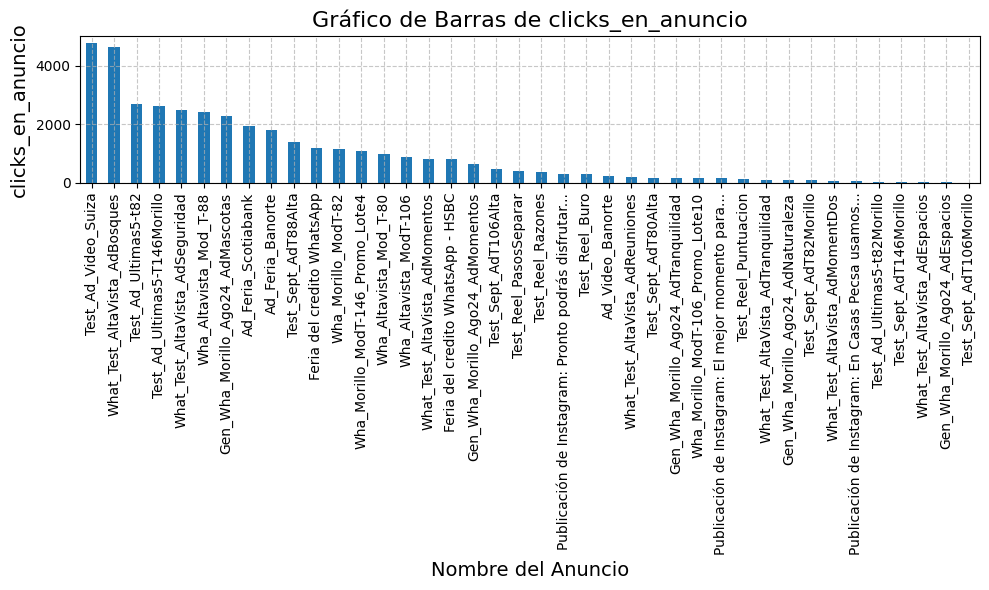

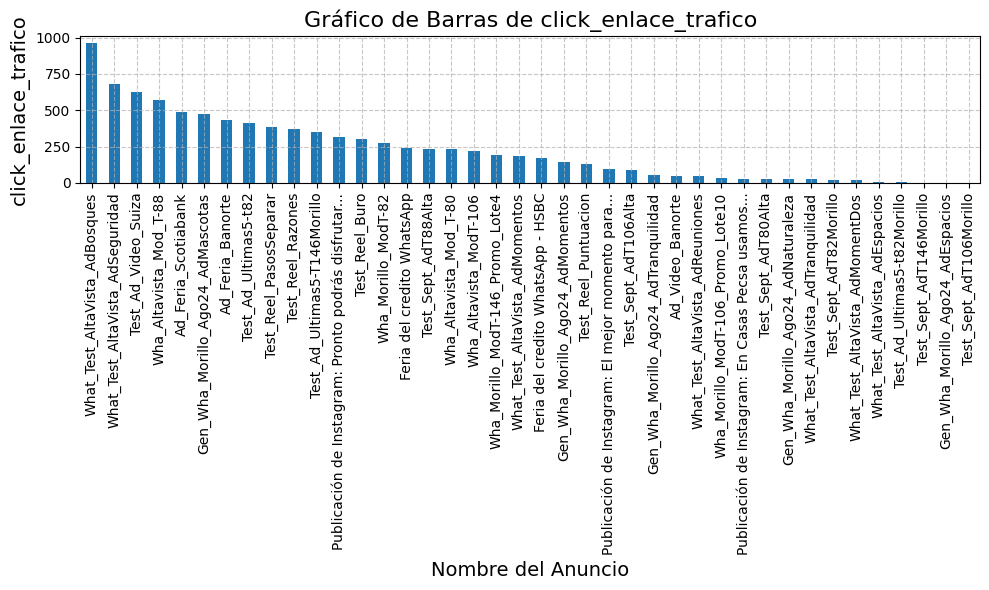

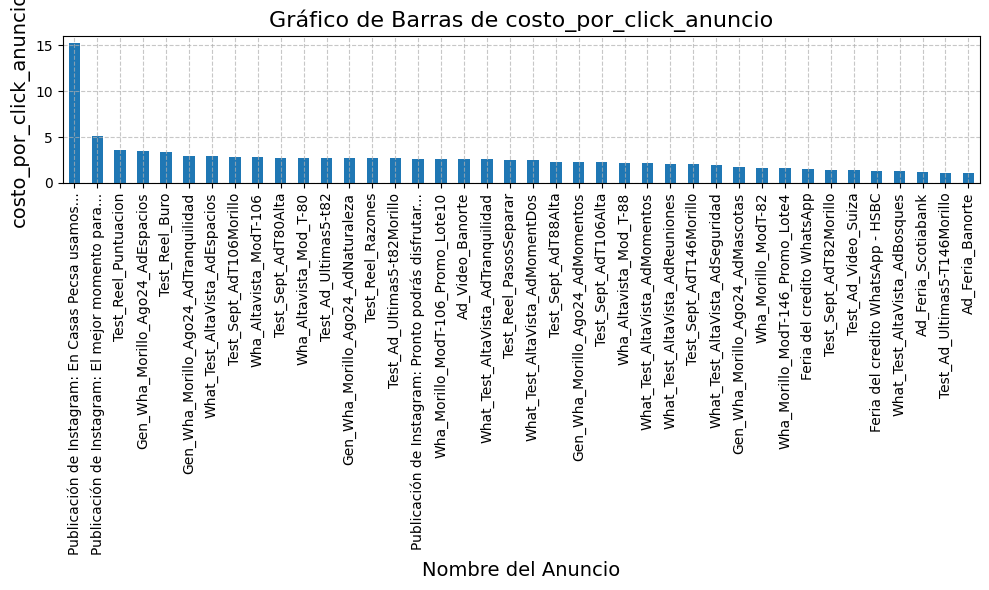

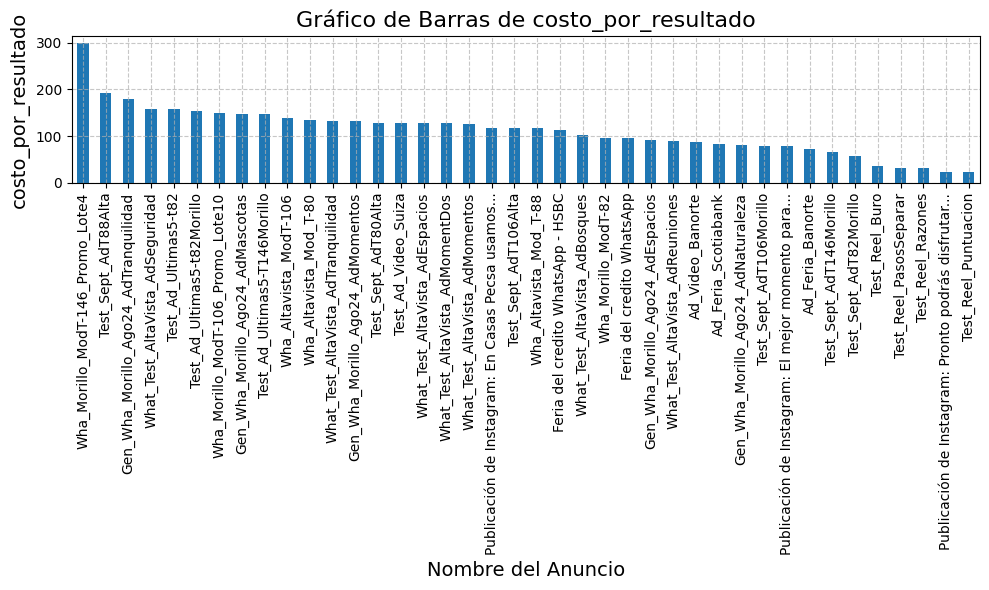

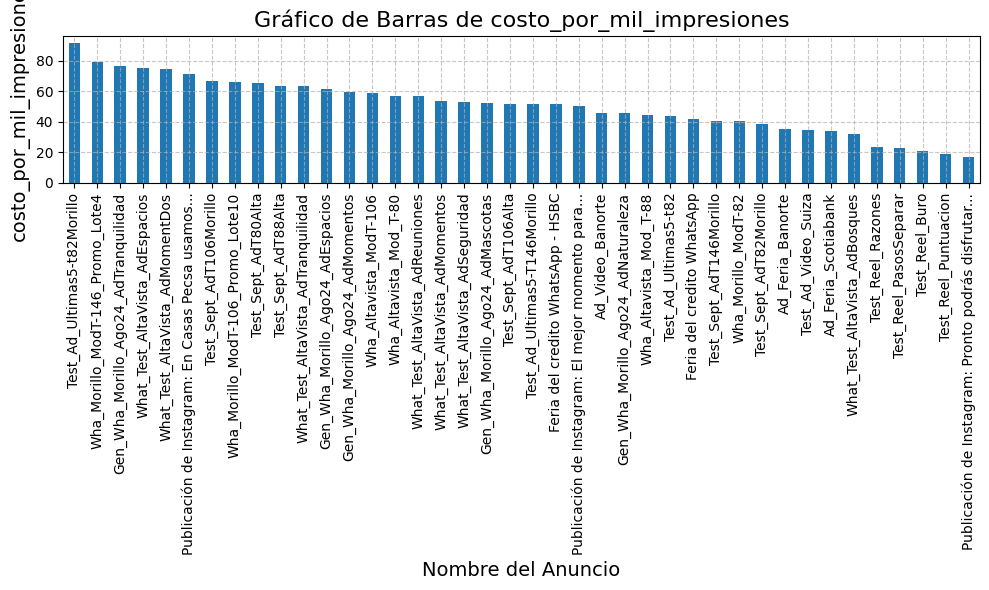

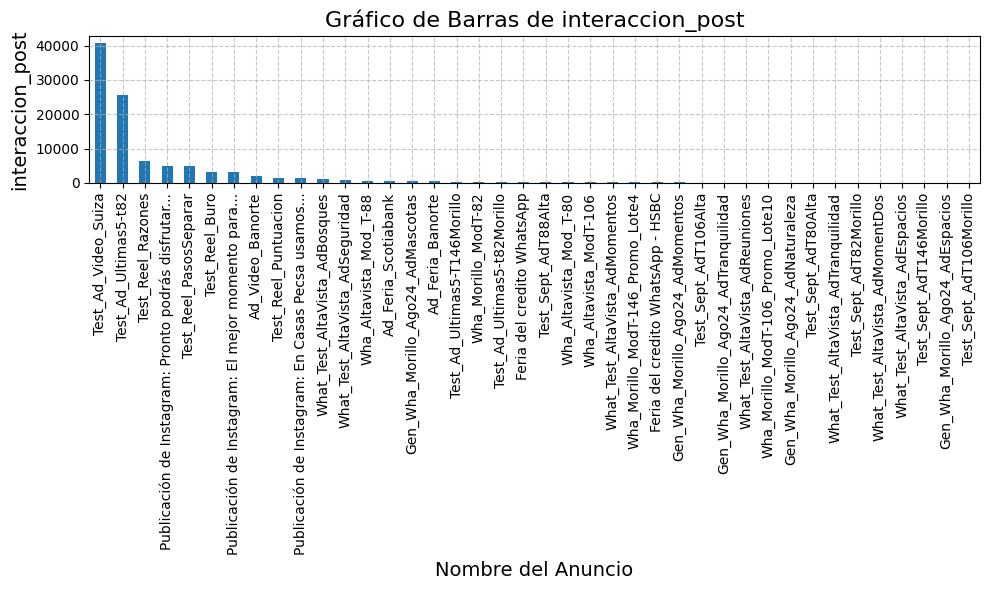

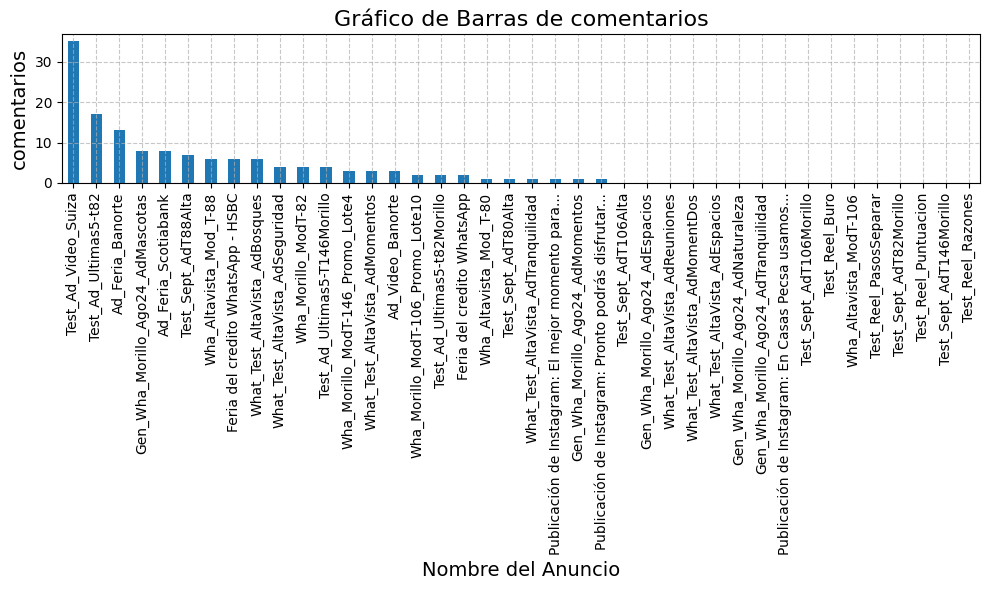

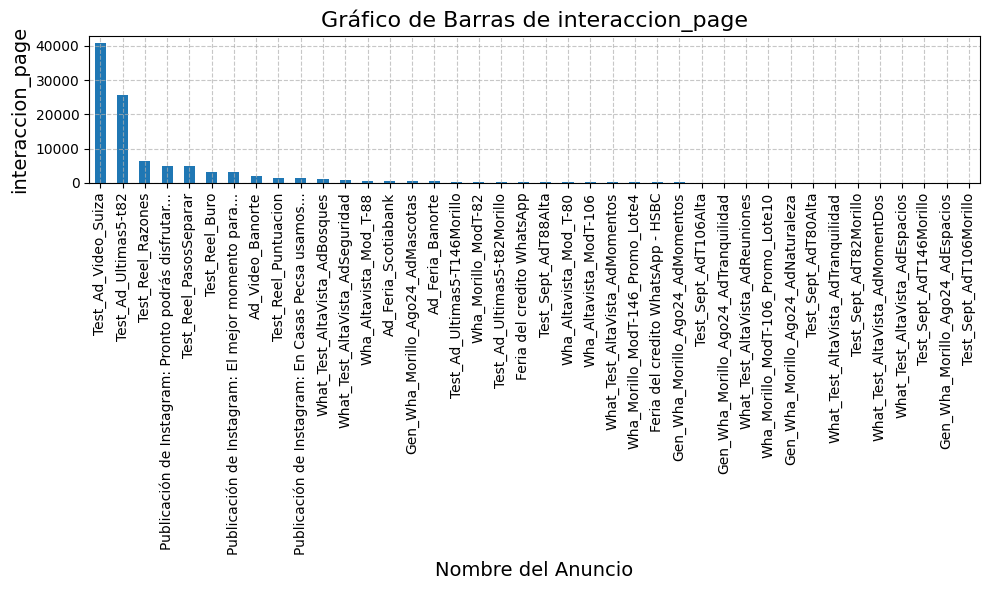

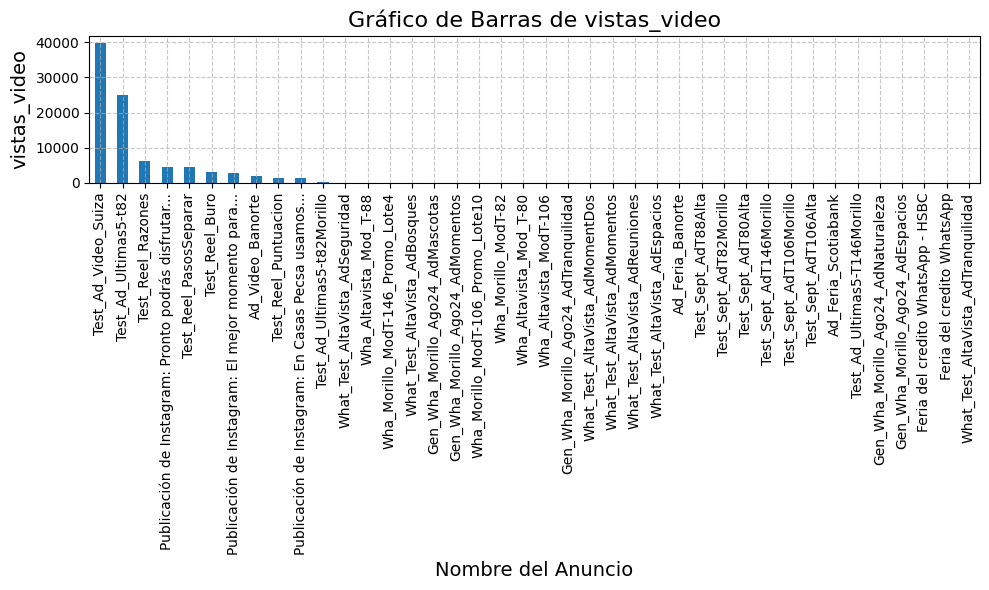

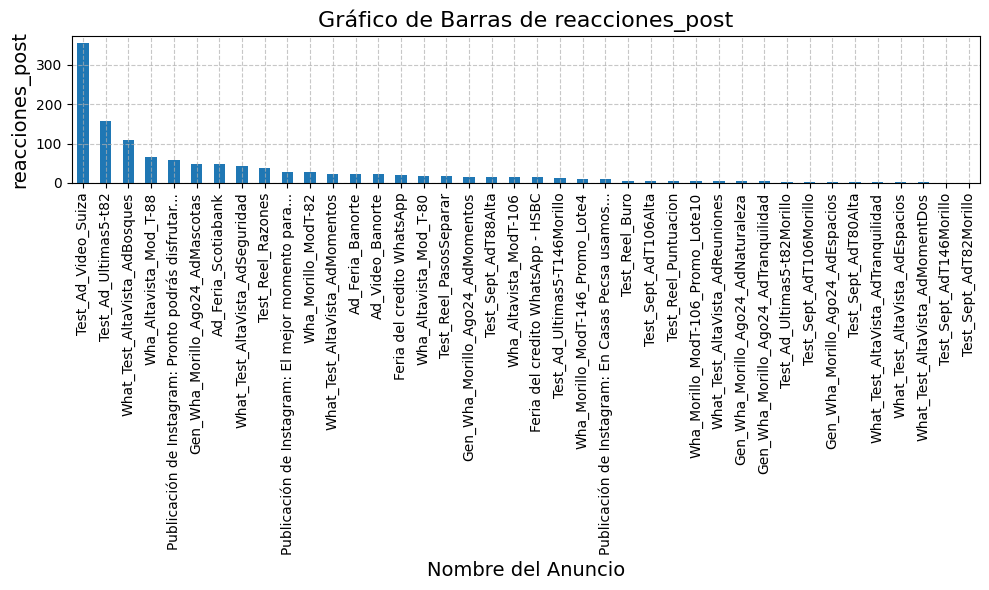

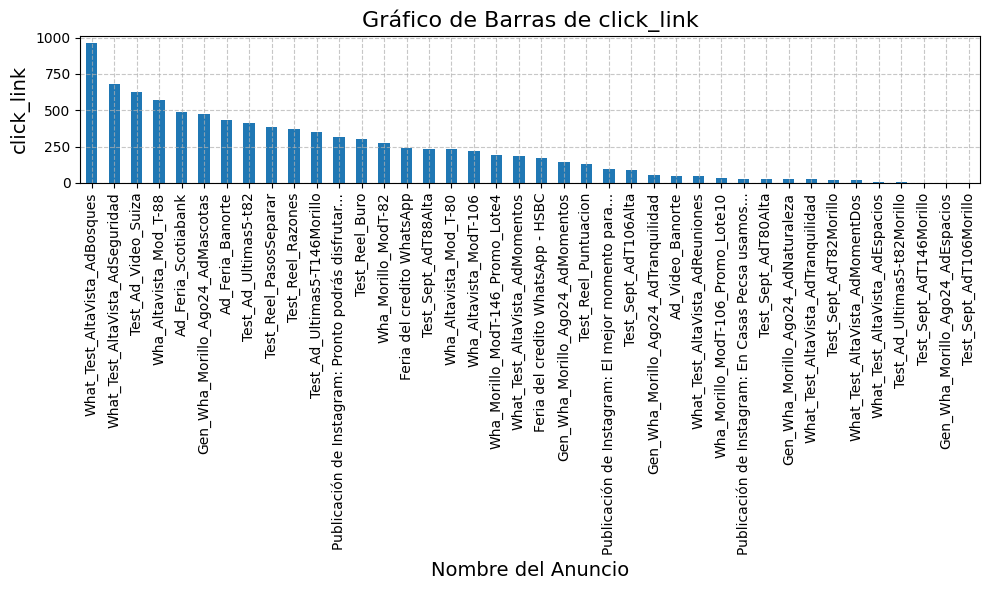

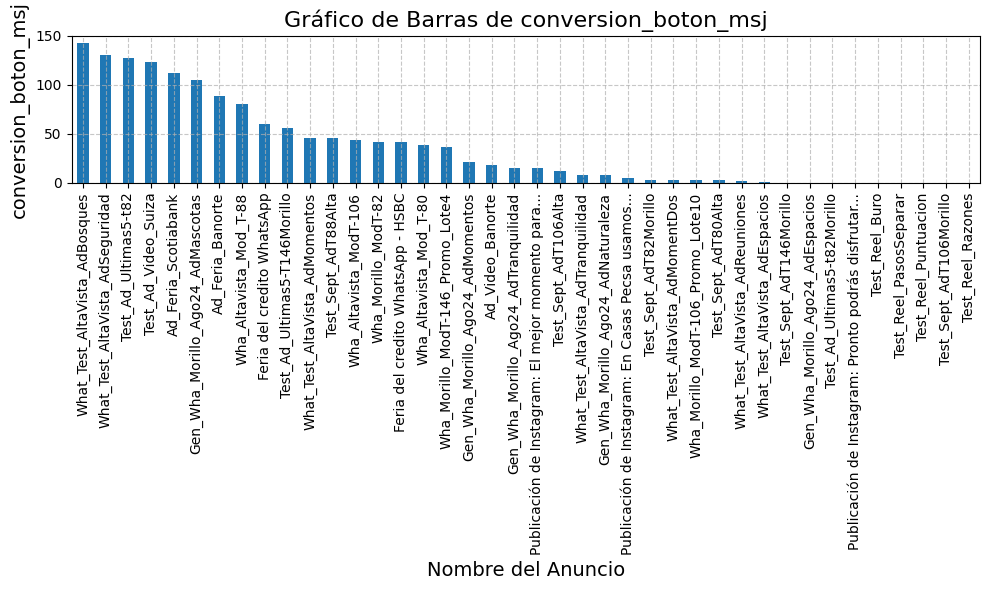

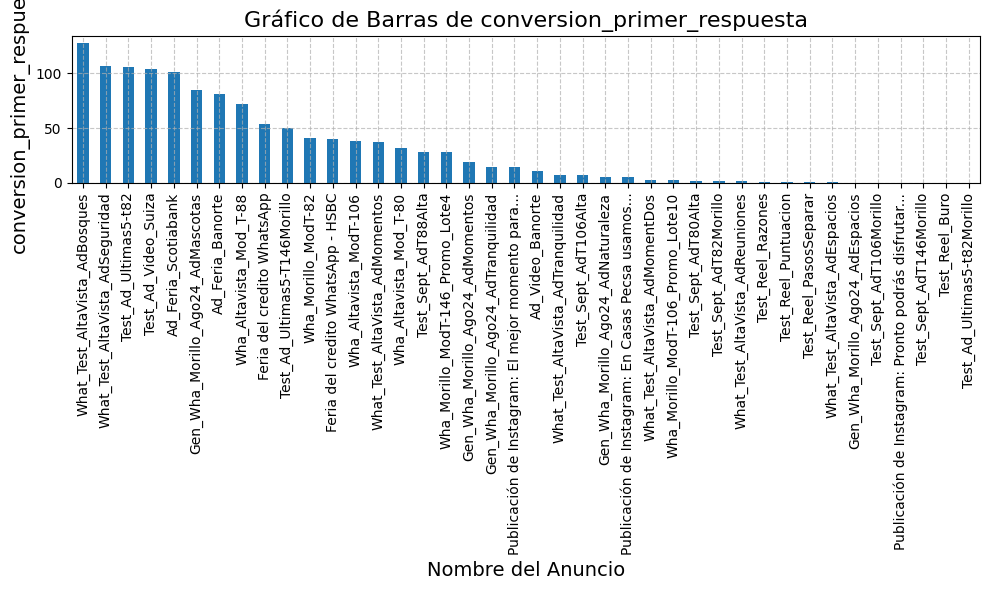

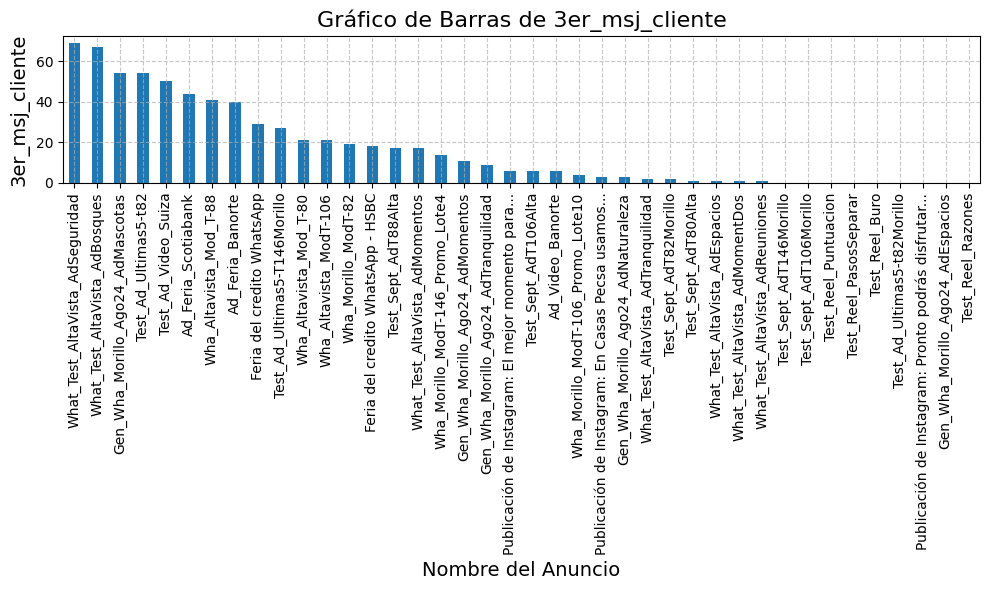

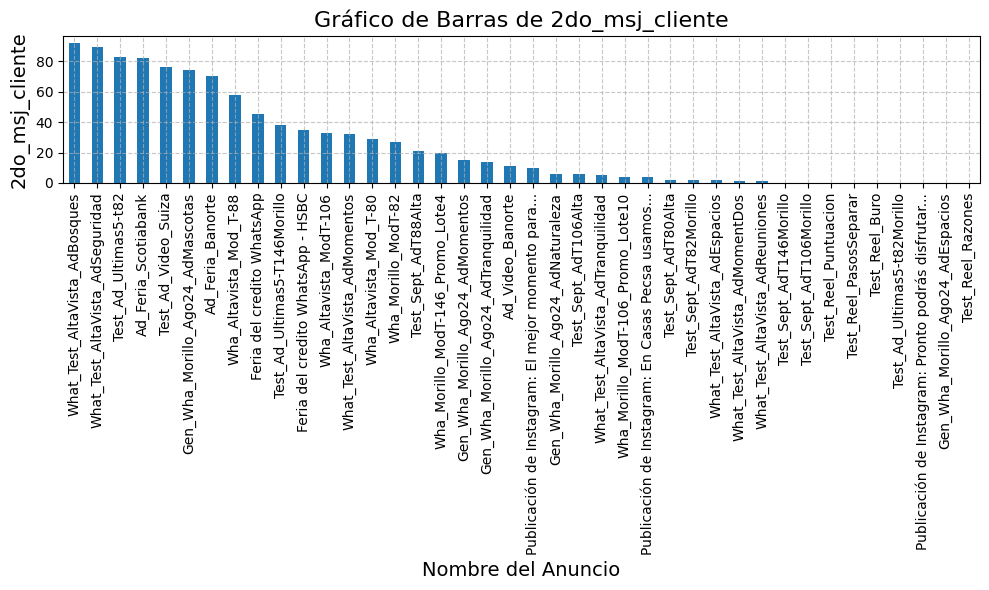

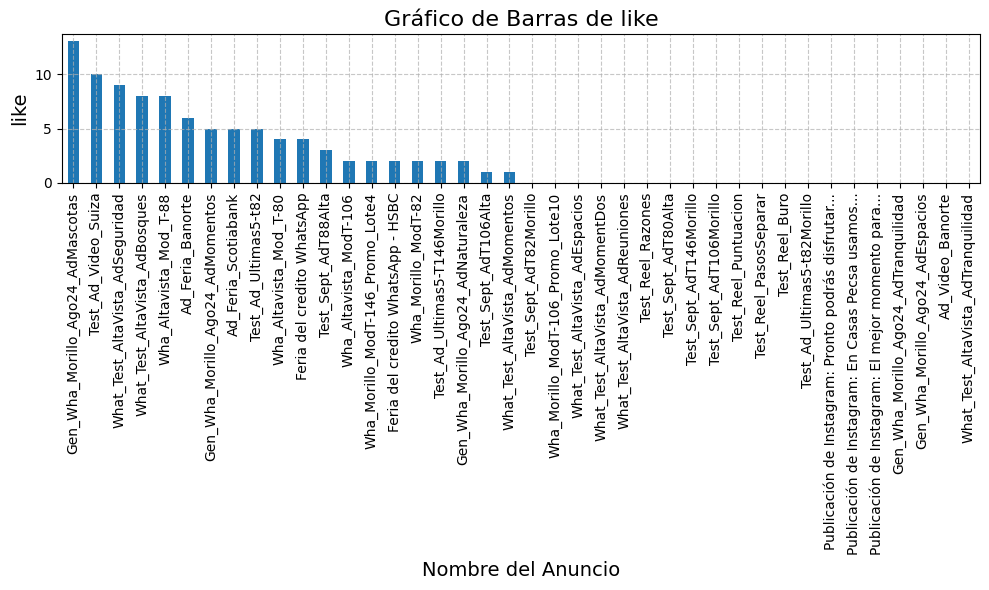

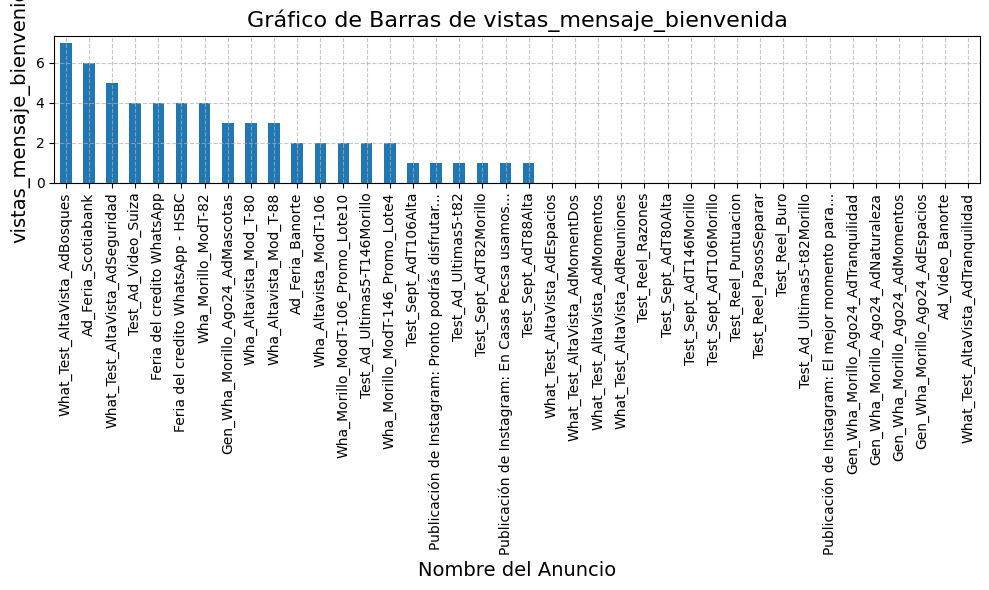

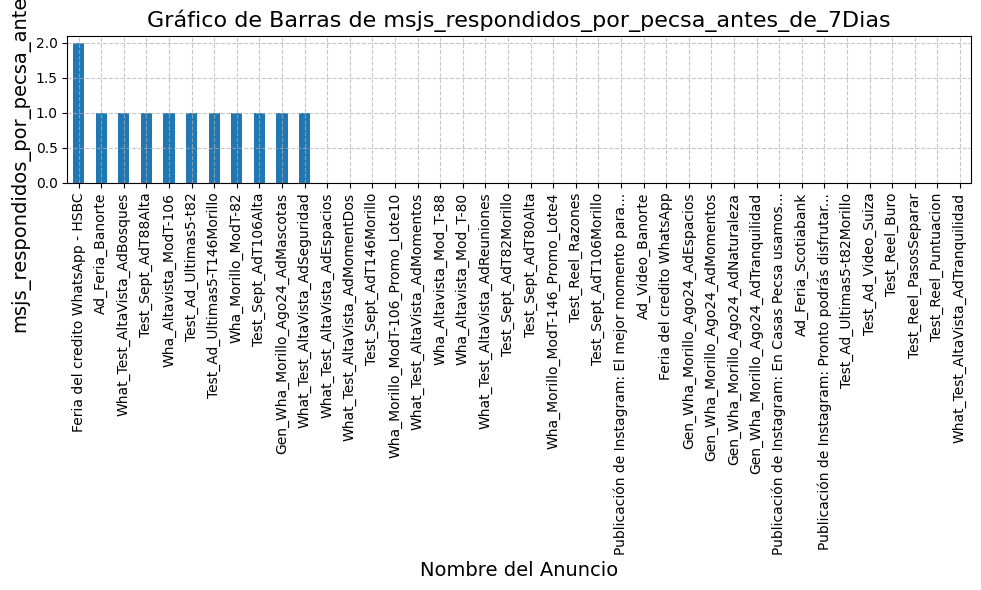

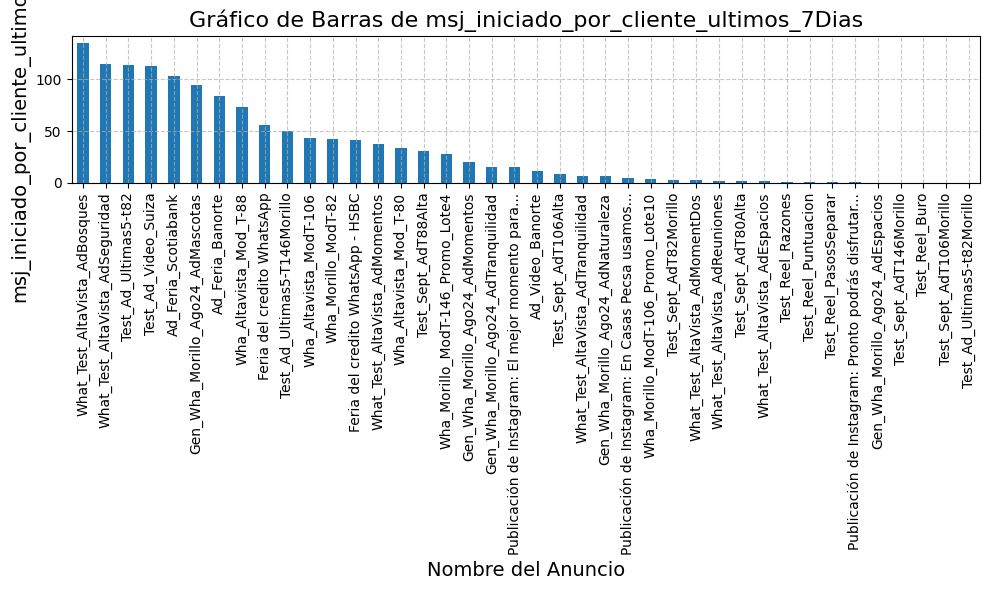

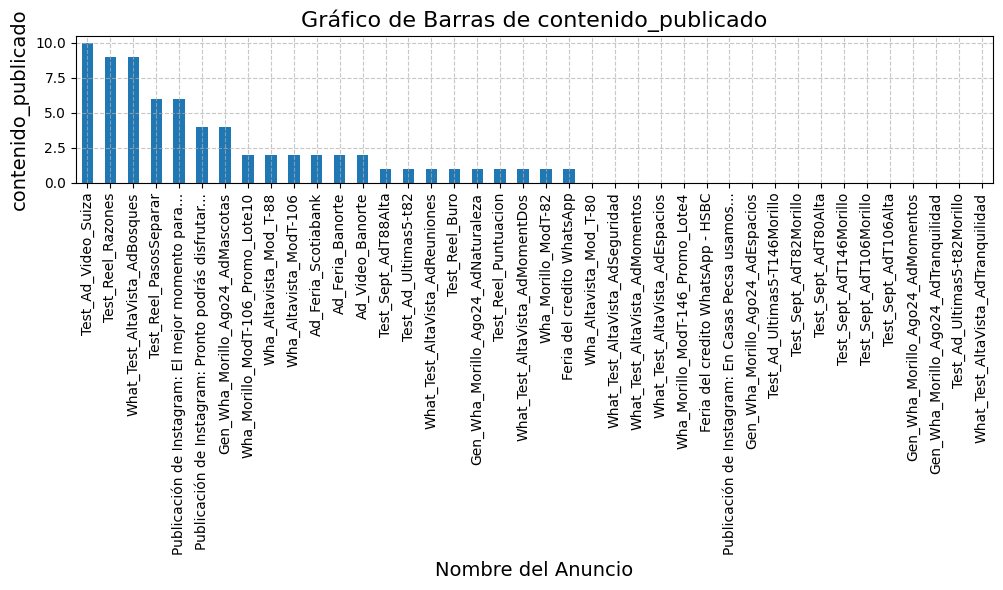

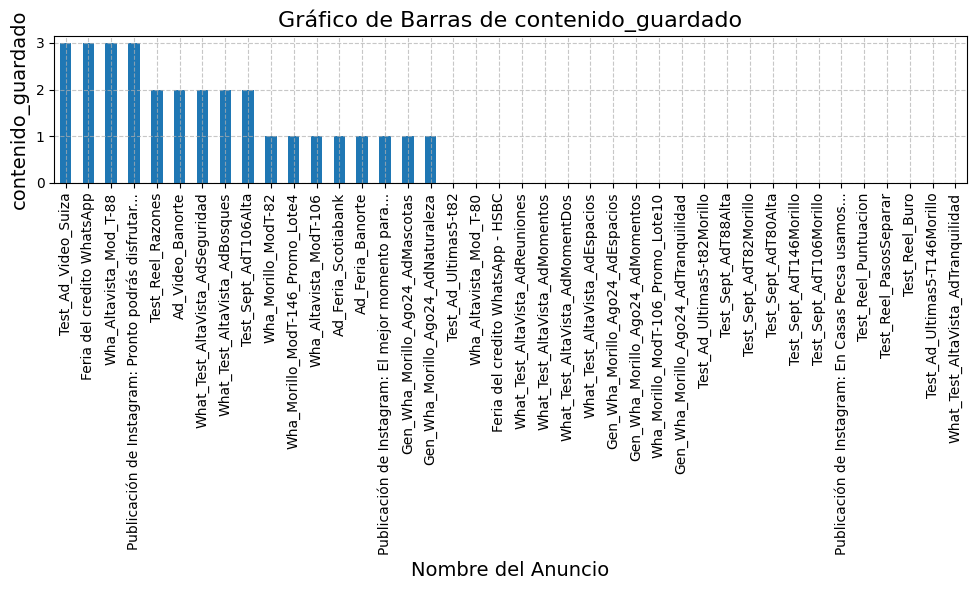

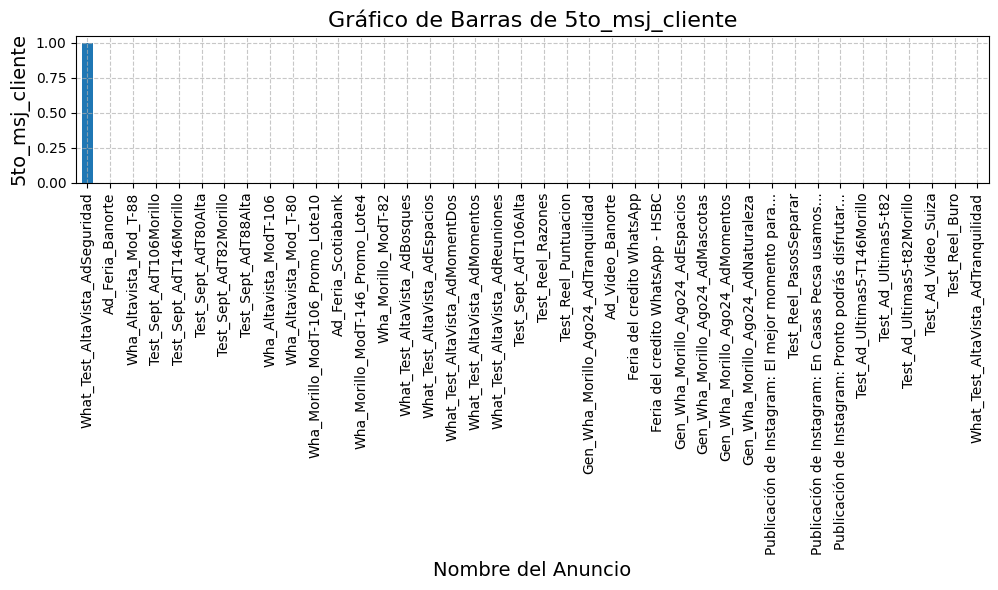

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV en un DataFrame
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Total/anuncios_insights_general_total_limpiado.csv")

# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include='number').columns

# Iterar sobre todas las columnas numéricas y crear gráficos de barras
for column in numeric_columns:
    # Agrupar por 'nombre_anuncio' y sumar los valores
    grouped_df = df.groupby('nombre_anuncio')[column].sum().sort_values(ascending=False)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = grouped_df.plot(kind='bar')
    plt.title(f'Gráfico de Barras de {column}', fontsize=16)
    plt.xlabel('Nombre del Anuncio', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Mostrar el gráfico
    plt.tight_layout()  # Asegurar que todo se vea bien
    plt.show()